# Conjunto de dados para classificação de diabetes dos Indios Pima

## Definição do Problema

O dataset Pima Indians Diabetes involve a predição de diabetes precoce dentro de 5 anos em Indios Pimas dado detalhes médicos. O data set pode ser encontrado em: <https://www.kaggle.com/uciml/pima-indians-diabetes-database>

É um problema de classificação binário (2-classes). O número de observações para cada classe não é balanceado. Existem 768 observações com 8 variáveis de entrada and 1 variável de saída. Valores que estão faltando são codificados como 0. O nome das variáveis são as seguintes:

1. Numero de vezes que paciente ficou gravida.
2. Concentração plasmática de glicose das ultimas 2 horas em um teste oral de tolerância à glicose.
3. Pressão sanguínea diastólica (mm Hg).
4. Espessura da dobra cutânea tricipital (mm).
5. Insulina sérica das ultimas 2 horas (mu U/ml).
6. IMC (weight in kg/(height in m)^2).
7. Função de pedigree de diabetes.
8. Idade (years).
9. Variavel de classe (0 or 1).


### Importação das bibliotecas

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import model_selection 
from sklearn.preprocessing import StandardScaler, Normalizer

### Carregando e definindo as colunas do dataset

In [2]:
data = pd.read_csv('diabetes.csv',header=0)

### Visualização e descrição dos dados

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print(data.shape)

(768, 9)


In [7]:
print(data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


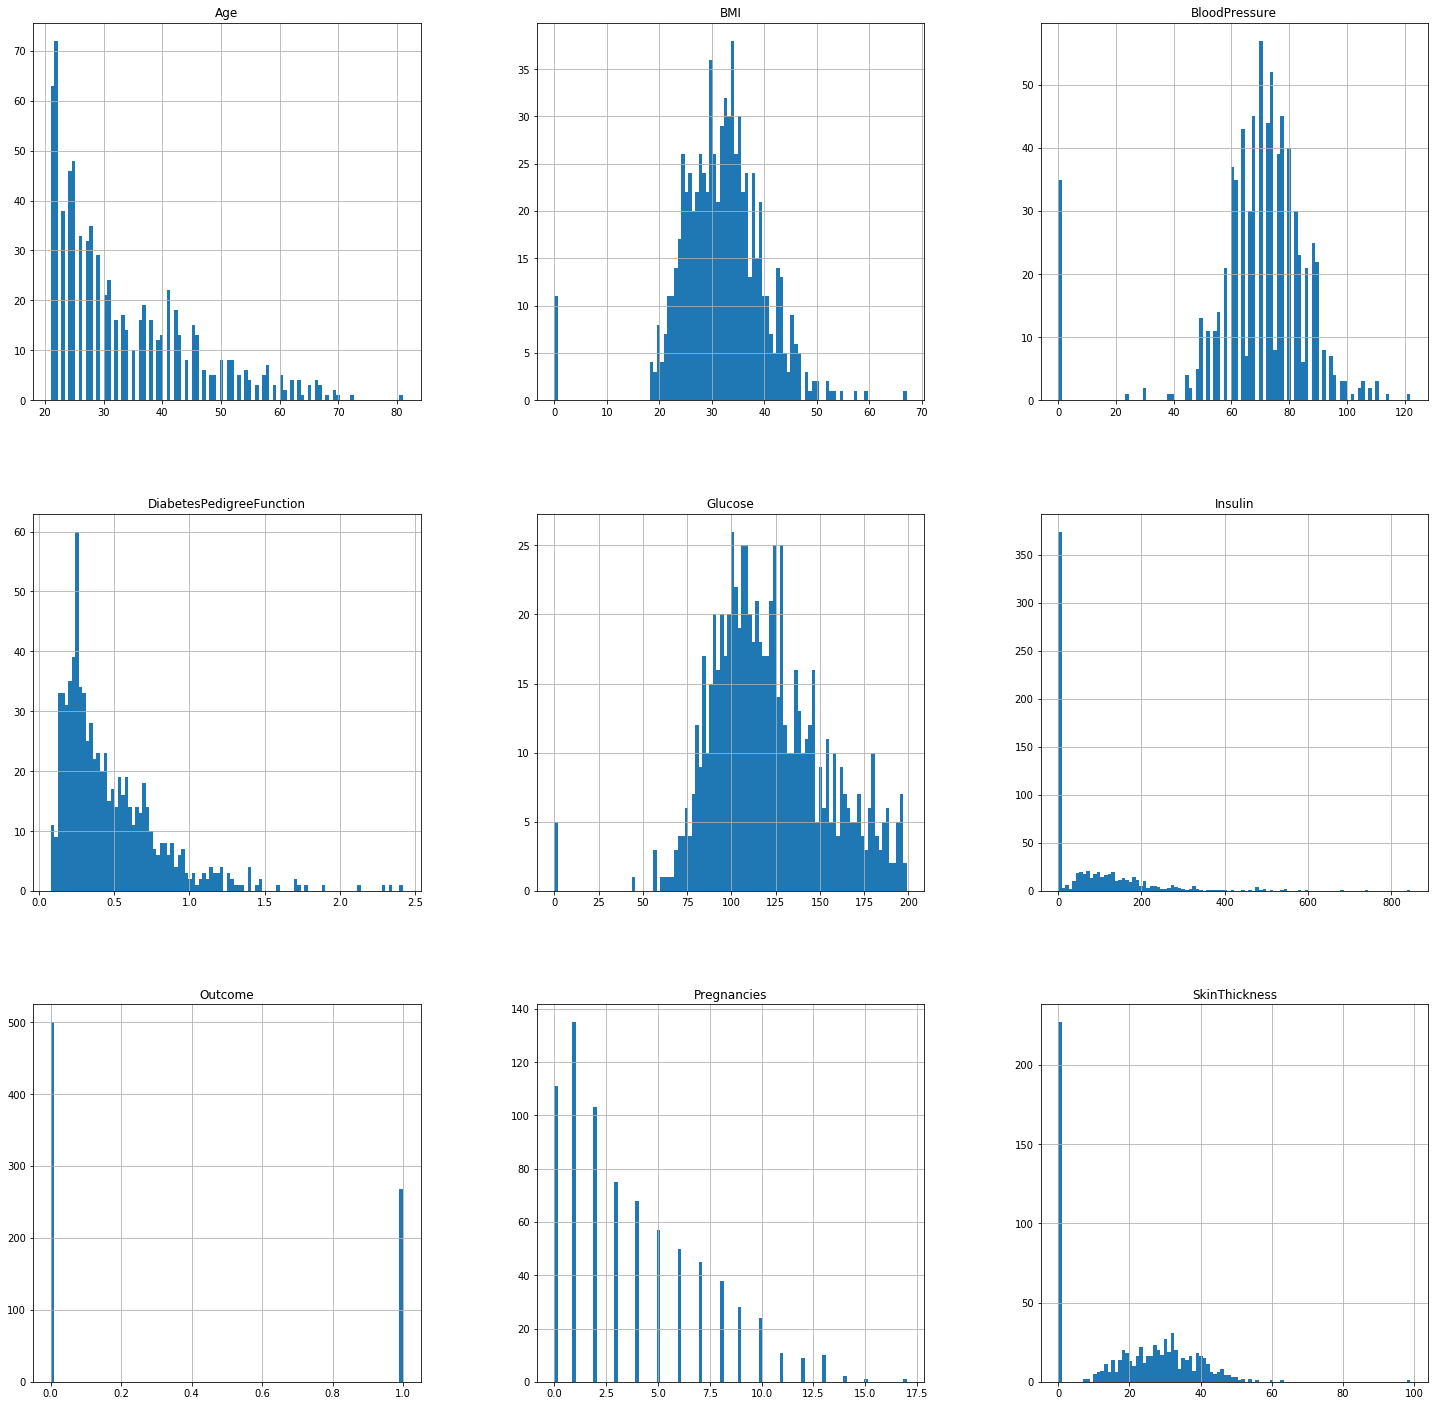

In [8]:
data.hist(figsize=(25,25), bins=100);

In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Criação do dataset de validação 

In [11]:
dataset = data.values
print(dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [12]:
np.random.seed(1)
np.random.shuffle(dataset)
dataset

array([[  7.   , 136.   ,  74.   , ...,   0.647,  51.   ,   0.   ],
       [  1.   , 151.   ,  60.   , ...,   0.179,  22.   ,   0.   ],
       [  6.   , 109.   ,  60.   , ...,   0.206,  27.   ,   0.   ],
       ...,
       [ 13.   , 126.   ,  90.   , ...,   0.583,  42.   ,   1.   ],
       [  4.   , 171.   ,  72.   , ...,   0.479,  26.   ,   1.   ],
       [  9.   , 102.   ,  76.   , ...,   0.665,  46.   ,   1.   ]])

In [13]:
X = dataset[:,:8]
y = dataset[:,8]

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((768, 8), (768,), (514, 8), (514,), (254, 8), (254,))

### Criação dos modelos

#### Classificadores utilizados:

- DecisionTreeClassifier
- SVC
- KNN
- Logistic Regression
- Naive Bayes
- SGDClassifier
- RandomForest
- GradientBoosting

In [16]:
resultados = {}
resultados['DTC'] = { 'model': tree.DecisionTreeClassifier() }
resultados['SVC'] = { 'model': svm.SVC() }
resultados['KNN'] = { 'model': neighbors.KNeighborsClassifier() }
resultados['LOR'] = { 'model': linear_model.LogisticRegression() }
resultados['NB'] = { 'model':  naive_bayes.GaussianNB() }
resultados['SGD'] = { 'model': linear_model.SGDClassifier(max_iter=1000) }
resultados['RF'] = { 'model': ensemble.RandomForestClassifier() }
resultados['GB'] = { 'model': ensemble.GradientBoostingClassifier() }

In [17]:
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train, y_train)
    resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
    resultados[key]['accuracy'] = metrics.accuracy_score(y_test, resultados[key]['y_pred'])

processando DTC...
processando SVC...
processando KNN...
processando LOR...
processando NB...
processando SGD...
processando RF...
processando GB...


In [18]:
df = pd.DataFrame(resultados)
df.T[['accuracy','y_pred']]

,accuracy,y_pred
DTC,0.649606,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ..."
GB,0.708661,"[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ..."
KNN,0.720472,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
LOR,0.740157,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
NB,0.724409,"[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
RF,0.700787,"[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ..."
SGD,0.665354,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ..."
SVC,0.625984,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [19]:
df_T = df.transpose()
df_T = df_T[ ['accuracy'] ]
df_T

,accuracy
DTC,0.649606
GB,0.708661
KNN,0.720472
LOR,0.740157
NB,0.724409
RF,0.700787
SGD,0.665354
SVC,0.625984


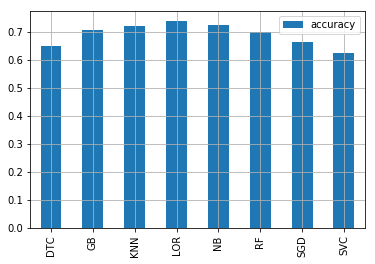

In [20]:
df_T.plot(kind='bar', grid=True);

In [37]:
modelo_final = linear_model.LogisticRegression()
modelo_final.fit(X,y);

In [22]:
norm = Normalizer()
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_test_std = std.transform(X_test)
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train_norm, y_train)
    resultados[key]['y_pred_norm'] = resultados[key]['model'].predict(X_test_norm)
    resultados[key]['accuracy_norm'] = metrics.accuracy_score(y_test, resultados[key]['y_pred_norm'])
    resultados[key]['model'].fit(X_train_std, y_train)
    resultados[key]['y_pred_std'] = resultados[key]['model'].predict(X_test_std)
    resultados[key]['accuracy_std'] = metrics.accuracy_score(y_test, resultados[key]['y_pred_std'])

processando DTC...
processando SVC...
processando KNN...
processando LOR...
processando NB...
processando SGD...
processando RF...
processando GB...


In [23]:
df = pd.DataFrame(resultados)
df_T = df.transpose()
df_T = df_T[ ['accuracy_norm', 'accuracy_std'] ]
df_T

,accuracy_norm,accuracy_std
DTC,0.622047,0.669291
GB,0.61811,0.704724
KNN,0.653543,0.704724
LOR,0.606299,0.76378
NB,0.606299,0.724409
RF,0.61811,0.681102
SGD,0.606299,0.767717
SVC,0.625984,0.76378


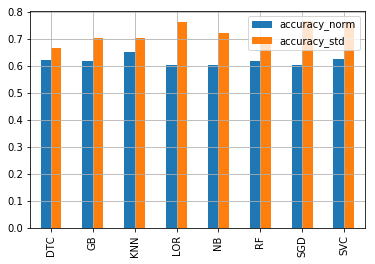

In [24]:
df_T.plot(kind='bar', grid=True);